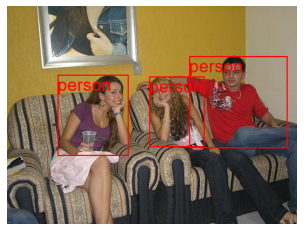

In [12]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt
import os

# 图像文件夹路径
image_folder = "labeled_images"

# 获取图像文件列表
image_files = [f for f in os.listdir(image_folder) if f.endswith(".jpg")]

# 选择一张图像进行测试
selected_image_file = image_files[1]
image_path = os.path.join(image_folder, selected_image_file)

# 读取图像
image = Image.open(image_path)

# 获取标签信息文件路径
labels_file_path = os.path.join(image_folder, f"{os.path.splitext(selected_image_file)[0]}_labels.txt")

# 如果存在标签信息文件，则读取标签信息并在图像上绘制标签框
if os.path.exists(labels_file_path):
    with open(labels_file_path, "r", encoding="utf-8") as labels_file:
        for line in labels_file:
            # 解析标签信息
            tag_info = line.split()
            tag_name = tag_info[0]
            left = float(tag_info[1]) * image.width
            top = float(tag_info[2]) * image.height
            width = float(tag_info[3]) * image.width
            height = float(tag_info[4]) * image.height

            # 绘制标签框
            draw = ImageDraw.Draw(image)
            draw.rectangle([left, top, left + width, top + height], outline="red", width=2)

            # 使用更大的字体
            font_size = 30
            font = ImageFont.truetype("arial.ttf", font_size)
            draw.text((left, top), tag_name, fill="red", font=font)

# 显示图像
plt.imshow(image)
plt.axis("off")
plt.show()
